In [8]:
#Enter your path of dataset from google drive  
import scipy.io as sio
GOOGLE_COLAB = True
path = ""
if GOOGLE_COLAB:
    from google.colab import drive, files
    drive.mount('/content/drive/',force_remount=True)
    path = "/content/drive/My Drive/"

dataset = path + "data.mat" 

#Enter path of your test image
my_image = path+"my_pic.png"
mat_contents = sio.loadmat(dataset)
#print(mat_contents)
images = mat_contents['images']
label = mat_contents['C']
print('Shape:',images.shape)


Mounted at /content/drive/
Shape: (50, 3072)


In [11]:
import numpy as np 
images= np.transpose(images)
print(images.shape)
im = np.reshape(images, [ 32, 32, 3, -1], order="F")
print(im.shape)

(3072, 50)
(32, 32, 3, 50)


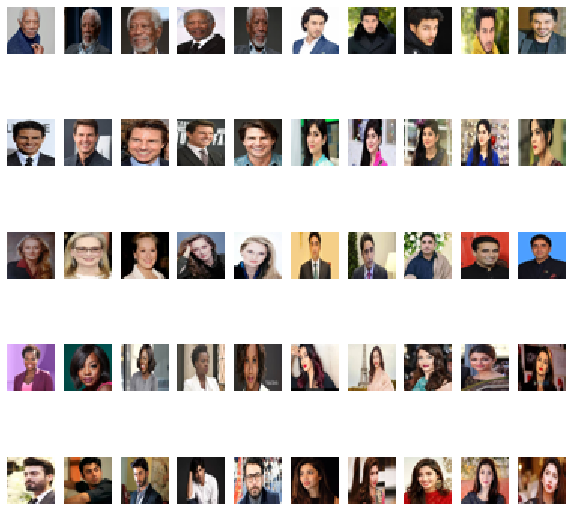

In [31]:
from matplotlib import pyplot as plt
import cv2
#Print all images
k = 0
fig, axis = plt.subplots(5,10,figsize=(10,10))
for i in range(5):
  for j in range(10):
    axis[i,j].imshow(im[:,:,:,k])
    k += 1
    axis[i,j].axis("off")
    
#Print nth image
#n = 10
#plt.imshow(im[:,:,:,n])
#print(im[:,:,:,n].shape)

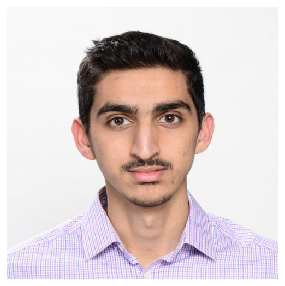

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original image shape:  (498, 496, 4)


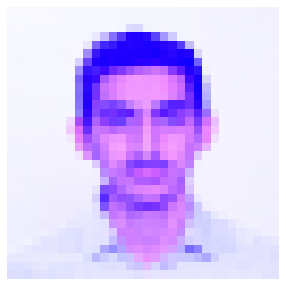

Re-sized image shape:  (32, 32, 3)
Re-shaped image dimension:  (3072,)
[70438872.15604776, 12537566.631870229, 38721294.91757202, 73784370.50358582, 17866071.030510545, 121962367.2203598, 22985348.856026597, 21163627.097388744, 55825863.93823981, 37673674.90225983, 72501161.0960724, 45851433.74733353, 46357766.37153483, 41559823.4052124, 40847642.6193113, 64614437.84037818, 82706377.29735577, 56988605.54741904, 67742419.30055213, 43364818.025059566, 21093373.30160141, 72489631.23477435, 34774985.657957315, 35645184.44087732, 111497665.52350798, 91289234.05982208, 72187256.13963318, 66408012.267276645, 31785800.558226585, 48208089.6772995, 72681582.34887695, 15826596.85799332, 59815358.194129944, 71878444.2010498, 19156744.450092316, 73072276.00288546, 119155589.83270264, 30412700.905849457, 50139885.863370895, 25546219.544031005, 92346908.24395752, 30140100.61894944, 33163907.620158903, 44782121.315334834, 70937723.79597136, 14205242.227260808, 54171567.48963988, 70060864.86818749, 530

In [121]:
from scipy import misc
from math import sqrt
from numpy import ndarray
from google.colab.patches import cv2_imshow
from scipy.ndimage import zoom
from pylab import rcParams
rcParams['figure.figsize'] = 5, 5

#Read your image here
path_image = path+"my_pic.png"
my_img = plt.imread(path_image)
plt.imshow(my_img)
plt.axis("off")
plt.show()
print("Original image shape: ",my_img.shape)


#Resize your image
scale_factor = 32 / 496 
height = int(my_img.shape[0] * scale_factor)
width = int(my_img.shape[1] * scale_factor)
dim = (width, height)
resized_img = cv2.resize(my_img, dim,interpolation = cv2.INTER_AREA)
resized_img = zoom(resized_img, (1, 1, 3/4))
plt.imshow(resized_img)
plt.axis("off")
plt.show()
print("Re-sized image shape: ",resized_img.shape)

"""

#Resize image Method 2
resized_img2 = zoom(my_img, (32/496, 32/496, 3/4))
plt.imshow(resized_img2,vmin=0, vmax=255)
plt.axis("off")
plt.show()
print("Method 2 resized image shape: ",resized_img2.shape)

#Comparing with one of the images in dataset
plt.imshow(im[:,:,:,10])
plt.axis("off")
plt.show()
print("Image shape: ",im[:,:,:,10].shape)

"""

#Reshape your image as we reshape the image of dataset
reshaped_img = np.reshape(resized_img, [ 32, 32, 3, -1], order="F")
reshaped_img = np.reshape(reshaped_img,[-1], order="F")
print("Re-shaped image dimension: ",reshaped_img.shape)

#Calculate Eucleadian distance between your image and dataset 
dist_euc = []
#Reshape all images to 1-d arrays/ vectors
for i in range(50):
    G = im[:,:,:,i]
    G = np.reshape(G,[-1], order="F") 
    dist_euc.append(sum(np.square(G - reshaped_img))) #Append least squares distance to list
print(dist_euc)

Minimum distance : 12537566.631870229
Index:  1
Displaying most similar image based on 1 neighbor: 


(-0.5, 31.5, 31.5, -0.5)

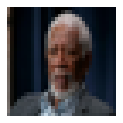

In [138]:
rcParams['figure.figsize'] = 2, 2
#Write code for 1 NN
#Find min distance
#Find at which point min value exists
print("Minimum distance :",min(dist_euc))
print("Index: ",dist_euc.index(min(dist_euc)))
print("Displaying most similar image based on 1 neighbor: ")
#Printing the image
n = dist_euc.index(min(dist_euc))
plt.imshow(im[:,:,:,n])
plt.axis("off")


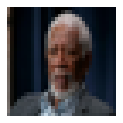

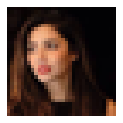

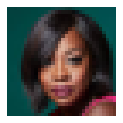

In [139]:
#3 NN
#Write code for 3 NN
#Find 3 min distances
#Find their instances
#hint: Use for Loop
from heapq import nsmallest
smallest_3 = nsmallest(3, dist_euc)
for i in range(len(smallest_3)):
   n = dist_euc.index(smallest_3[i])
   plt.imshow(im[:,:,:,n])
   plt.axis("off")
   plt.show()


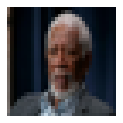

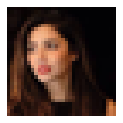

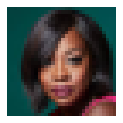

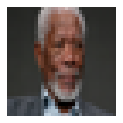

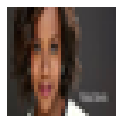

In [140]:
#Write code for 5 NN
#Find 5 min distances
#Find their instances
#hint: Use for Loop
smallest_5 = nsmallest(5, dist_euc)
for i in range(len(smallest_5)):
   n = dist_euc.index(smallest_5[i])
   plt.imshow(im[:,:,:,n])
   plt.axis("off")
   plt.show()
    